In [75]:
import scipy.io
import os
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import numpy as np
import cv2
from tqdm.notebook import tqdm
import pandas as pd 

plt.rcParams['image.cmap'] = 'viridis'

[Data source](https://ndownloader.figshare.com/files/14487263?private_link=d932c564d5cdd7186679)

In [76]:
!ls

170704plc1p2  Untitled.ipynb


In [61]:
all_paths =  os.listdir("170704plc1p2")
all_paths_np = np.array(all_paths)
bools_image_paths = [all_paths[i][0] == "m" for i in range(len(all_paths))]
bools_seg_paths = [all_paths[i][0] == "T" for i in range(len(all_paths))]
image_paths = all_paths_np[bools_image_paths]
seg_paths = all_paths_np[bools_seg_paths]

In [65]:
image_paths = all_paths_np[bools_image_paths]
seg_paths = all_paths_np[bools_seg_paths]

In [66]:
image_paths

array(['membt073.mat', 'membt071.mat', 'membt038.mat', 'membt069.mat',
       'membt042.mat', 'membt077.mat', 'membt060.mat', 'membt085.mat',
       'membt024.mat', 'membt037.mat', 'membt063.mat', 'membt049.mat',
       'membt061.mat', 'membt041.mat', 'membt050.mat', 'membt019.mat',
       'membt082.mat', 'membt068.mat', 'membt025.mat', 'membt030.mat',
       'membt006.mat', 'membt076.mat', 'membt012.mat', 'membt056.mat',
       'membt013.mat', 'membt051.mat', 'membt064.mat', 'membt043.mat',
       'membt003.mat', 'membt029.mat', 'membt091.mat', 'membt040.mat',
       'membt058.mat', 'membt087.mat', 'membt079.mat', 'membt005.mat',
       'membt054.mat', 'membt011.mat', 'membt088.mat', 'membt045.mat',
       'membt062.mat', 'membt095.mat', 'membt053.mat', 'membt074.mat',
       'membt015.mat', 'membt007.mat', 'membt023.mat', 'membt092.mat',
       'membt010.mat', 'membt034.mat', 'membt052.mat', 'membt086.mat',
       'membt032.mat', 'membt014.mat', 'membt067.mat', 'membt028.mat',
      

In [67]:
image_paths[0]

'membt073.mat'

In [68]:
mat = scipy.io.loadmat("170704plc1p2/" + image_paths[10])
seg_np = scipy.io.loadmat("170704plc1p2/" + seg_paths[10])

In [69]:
mat.keys(), seg_np.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'embryo']),
 dict_keys(['__header__', '__version__', '__globals__', 'membSeg']))

In [70]:
image = (mat["embryo"])
segmented = seg_np["membSeg"]

In [72]:
segmented.shape,image.shape



((205, 285, 134), (256, 356, 70))

In [73]:
def show_n_channel_image(n_channels, image):
    for i in range(n_channels):
        clear_output(wait=True)
        plt.imshow(image[:,:,i])
        plt.show()


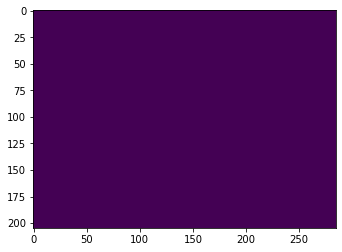

In [74]:
show_n_channel_image(134, segmented)


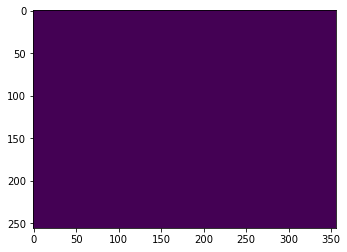

In [77]:
show_n_channel_image(70, image)


In [80]:
seg_mv = np.moveaxis(segmented, 2,0)

def partition(lst, n):
    increment = len(lst) / float(n)
    last = 0
    i = 1
    results = []
    while last < len(lst):
        idx = int(round(increment * i))
        results.append(lst[last:idx])
        last = idx
        i += 1
    return results

In [81]:
slices = partition(seg_mv, 70)


In [82]:
def show_images(img_list):
    len_x = len(img_list)
    
    fig, ax = plt.subplots(1,len_x, figsize = (10,3))
    for i in range(len(img_list)):
        ax.flat[i].imshow(img_list[i])

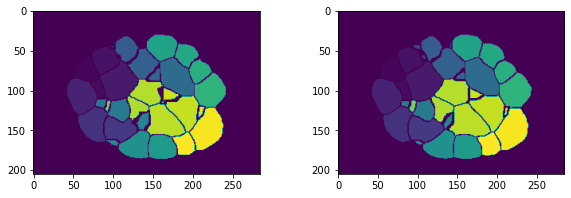

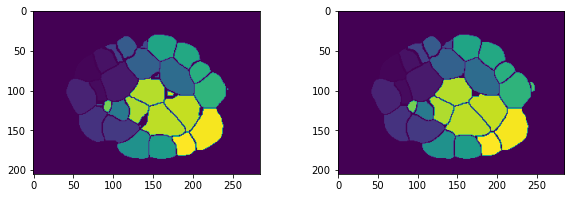

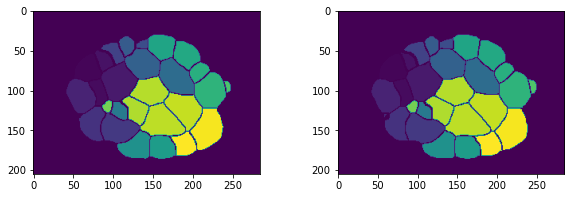

In [83]:
for i in range(30,33,1):
    
    show_images(slices[i])

In [85]:
def prepare_segmentation_data(data_foldername = "170704plc1p2",  save_folder = "training_data"):
    metadata = []
    
    if os.path.isdir(save_folder) is not True:
        os.mkdir(save_folder)
        os.mkdir(save_folder + "/" + "masks")
        os.mkdir(save_folder + "/" + "images")
        
        
    all_paths =  os.listdir(data_foldername)
    all_paths_np = np.array(all_paths)
    bools_image_paths = [all_paths[i][0] == "m" for i in range(len(all_paths))]
    bools_seg_paths = [all_paths[i][0] == "T" for i in range(len(all_paths))]
    image_paths = all_paths_np[bools_image_paths]
    seg_paths = all_paths_np[bools_seg_paths]
    
    for i in tqdm(range(len(image_paths))):
        img_mat = scipy.io.loadmat(data_foldername + "/" + image_paths[i])
        seg_mat = scipy.io.loadmat(data_foldername + "/" + seg_paths[i])

        images = mat["embryo"]
        segs = seg_mat["membSeg"]
        
        images_mv = np.moveaxis(images, 2,0)
        seg_mv = np.moveaxis(segmented, 2,0)
        
        slices = partition(seg_mv, 70)
        
        for j in range(9,58,1):  ## exclude black or mostly black images 
            image_name = "real_" + str(i)+"_"+str(j)+ ".jpg"

            image = images_mv[j]
            masks = slices[j]
            
            cv2.imwrite(save_folder + "/images/" + image_name, image)
#             print(save_folder + "/images/" + image_name)
            
            for k in range(len(masks)):
                mask_name = "mask_" + str(i) + "_" + str(j) + "_" + str(k) + ".jpg"
                cv2.imwrite(save_folder + "/masks/" + mask_name, masks[k])
                metadata.append([save_folder + "/images/" + image_name, save_folder + "/masks/" + mask_name])
    return metadata

In [86]:
metadata = prepare_segmentation_data(data_foldername = "170704plc1p2")


In [87]:
df = pd.DataFrame(metadata, columns = ["image", "mask"])


In [88]:
df.head()


,image,mask
0,training_data/images/real_0_9.jpg,training_data/masks/mask_0_9_0.jpg
1,training_data/images/real_0_9.jpg,training_data/masks/mask_0_9_1.jpg
2,training_data/images/real_0_10.jpg,training_data/masks/mask_0_10_0.jpg
3,training_data/images/real_0_10.jpg,training_data/masks/mask_0_10_1.jpg
4,training_data/images/real_0_11.jpg,training_data/masks/mask_0_11_0.jpg


In [89]:
df.to_csv("metadata.csv", index = False )
